<a href="https://colab.research.google.com/github/Kuzay3t/industrial-predictive-maintenance/blob/main/AI_IoT_Predictive_Maintenance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREDICTIVE MAINTENANCE USING AI**

 This study is to create asystem using machine learning and iot for Nigerian industries as there is a growing demand for reliable and efficient maintenance strategies. Consequently, Nigerian Industries can benefit from an optimized production process through data precision, cost reduction, improved decision-making and scalability.This research aims to conduct a comprehensive analysis of AI-driven predictive maintenance for industrial equipment using four ensemble Machine Learning techniques. These techniques include Logistic Regression, Random Forest, Support Vector Machine (SVM), and XGBoost, to accurately classify equipment fault conditions based on equipment characteristics.

In [ ]:
# import necessary libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
from google.colab import files
file = files.upload()

Saving equipment_anomaly_data.csv to equipment_anomaly_data (3).csv


# **DATA PREPERATION**

In [116]:
data = pd.read_csv("equipment_anomaly_data.csv")

/tmp/ipython-input-389068941.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("equipment_anomaly_data.csv")


In [117]:
data.head()

,temperature,pressure,vibration,humidity,equipment,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,0.0


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   faulty       7672 non-null   float64
dtypes: float64(5), object(1)
memory usage: 48.0+ MB


In [119]:
# Remove rows where all columns are NaN
data_clean = data.dropna(how='all')

print(data_clean.shape)
print(data_clean.isnull().sum())
data = data_clean

(7672, 6)
temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
faulty         0
dtype: int64


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7672 entries, 0 to 7671
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   faulty       7672 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.6+ KB


In [121]:
data.describe()

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922478,35.738048,1.611809,50.016574,0.099974
std,16.200059,10.381593,0.728560,11.841479,0.299985
min,10.269385,3.620798,-0.428188,10.215077,0.000000
25%,62.777057,29.485682,1.170906,42.612817,0.000000
50%,70.156900,35.227544,1.533113,50.024744,0.000000
75%,77.568387,41.159913,1.924700,57.340513,0.000000
max,149.690420,79.887734,4.990537,89.984718,1.000000


In [122]:
data.columns

Index(['temperature', 'pressure', 'vibration', 'humidity', 'equipment',
       'faulty'],
      dtype='object')

In [123]:
data["equipment"].value_counts()

,count
equipment,
Compressor,2573
Turbine,2565
Pump,2534


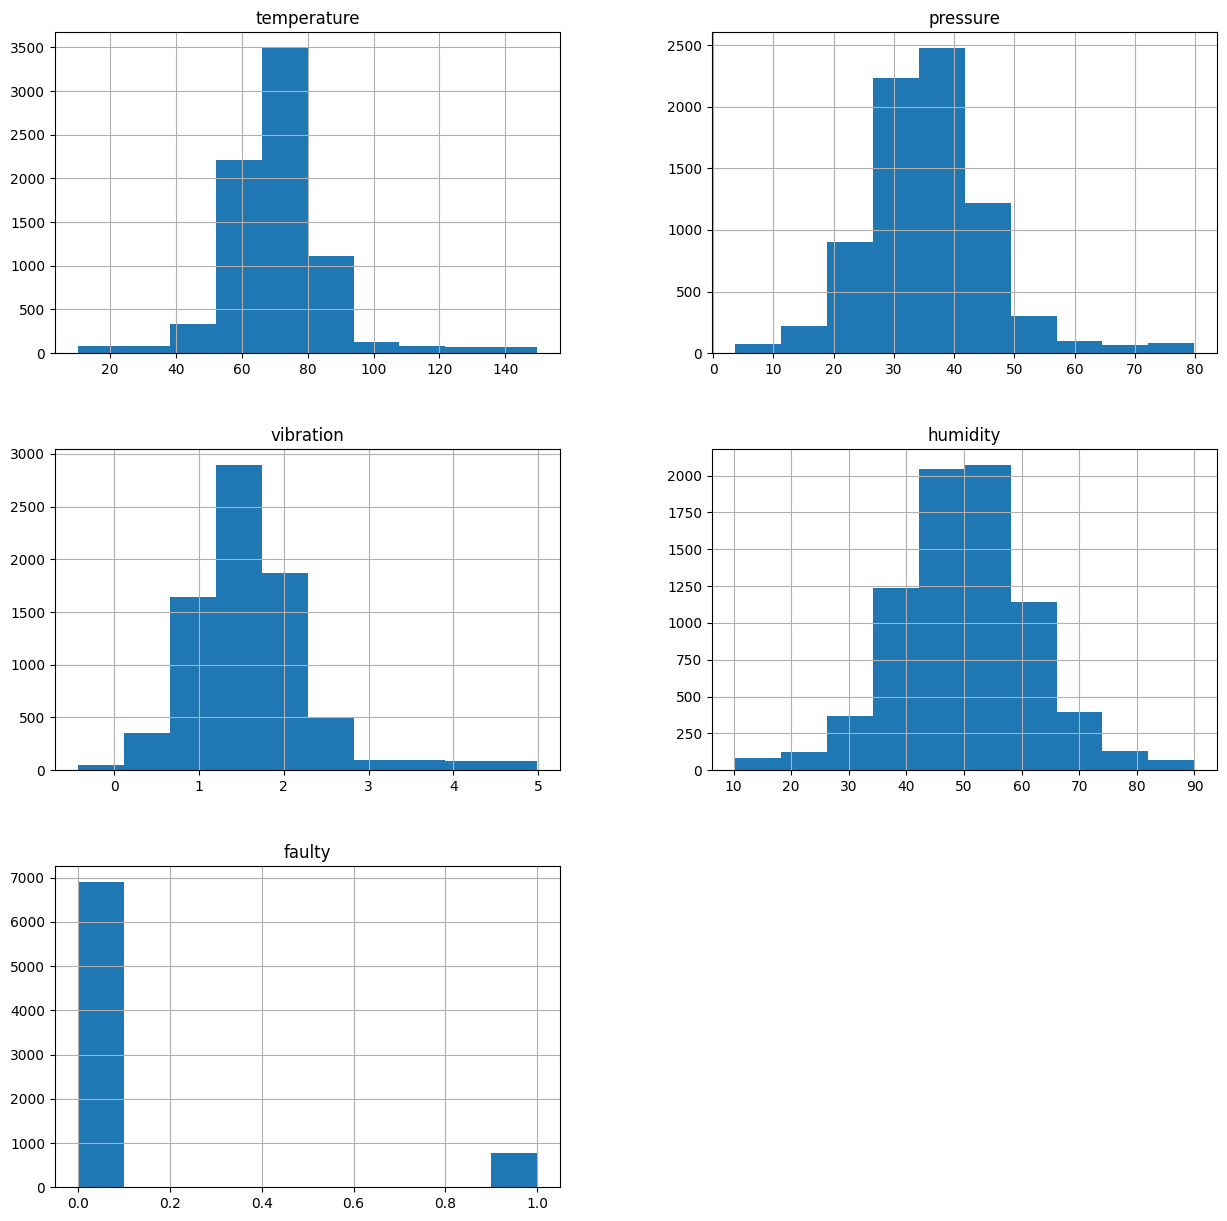

In [124]:
data.hist(figsize=(15,15))
plt.show()

<Axes: xlabel='faulty', ylabel='temperature'>

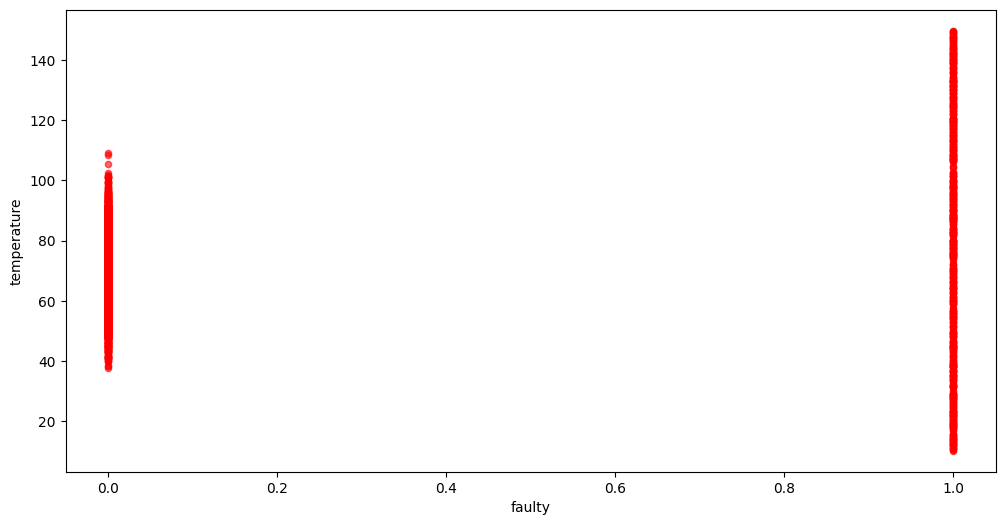

In [125]:
data.plot(kind = "scatter", figsize = (12,6), color = "red", alpha = 0.6, x = "faulty", y = "temperature")

<Axes: xlabel='faulty', ylabel='pressure'>

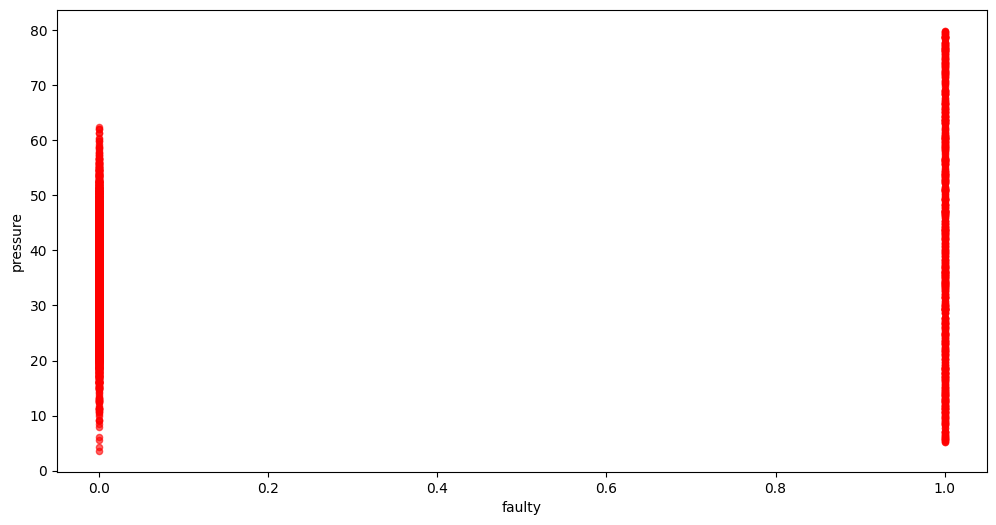

In [126]:
data.plot(kind = "scatter", figsize = (12,6), color = "red", alpha = 0.6, x = "faulty", y = "pressure")

<Axes: xlabel='faulty', ylabel='humidity'>

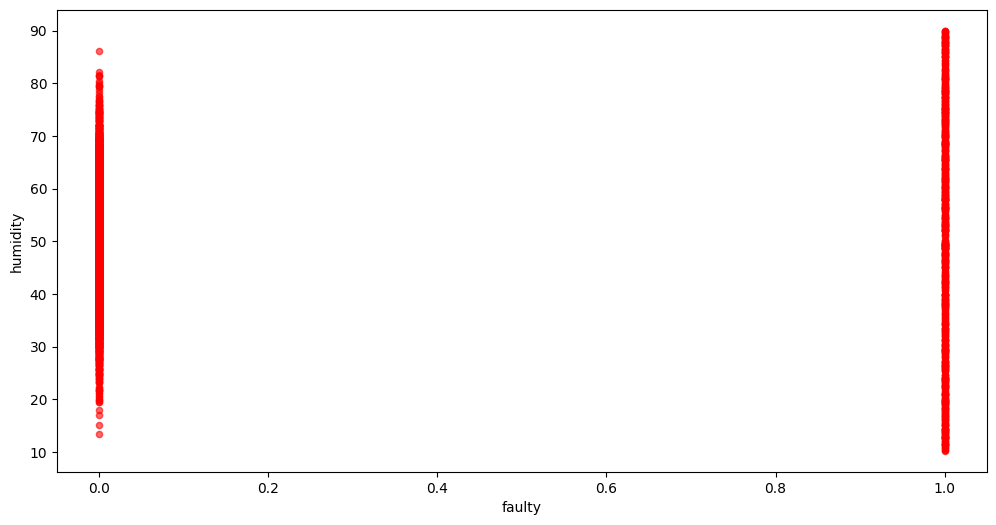

In [127]:
data.plot(kind = "scatter", figsize = (12,6), color = "red", alpha = 0.6, x = "faulty", y = "humidity")

<Axes: xlabel='faulty', ylabel='vibration'>

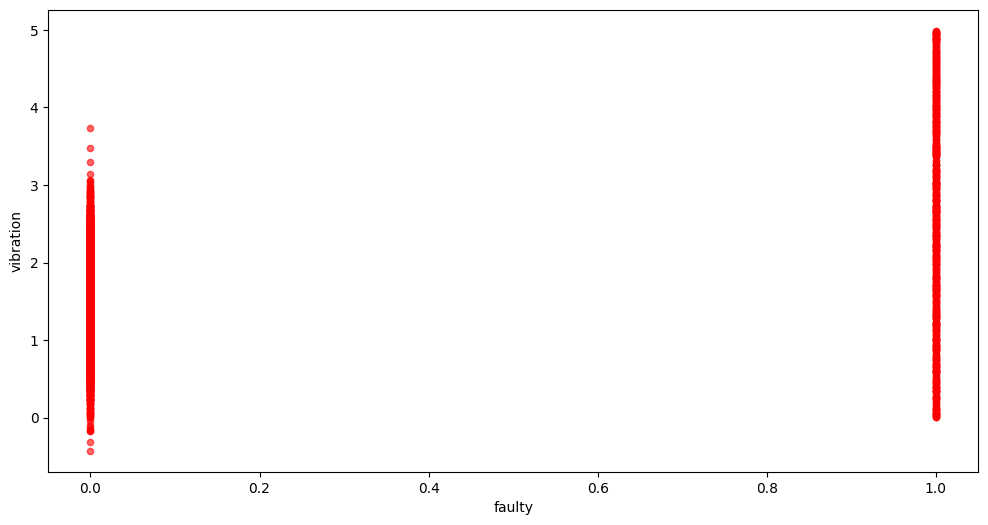

In [128]:
data.plot(kind = "scatter", figsize = (12,6), color = "red", alpha = 0.6, x = "faulty", y ="vibration")

<Axes: xlabel='vibration', ylabel='temperature'>

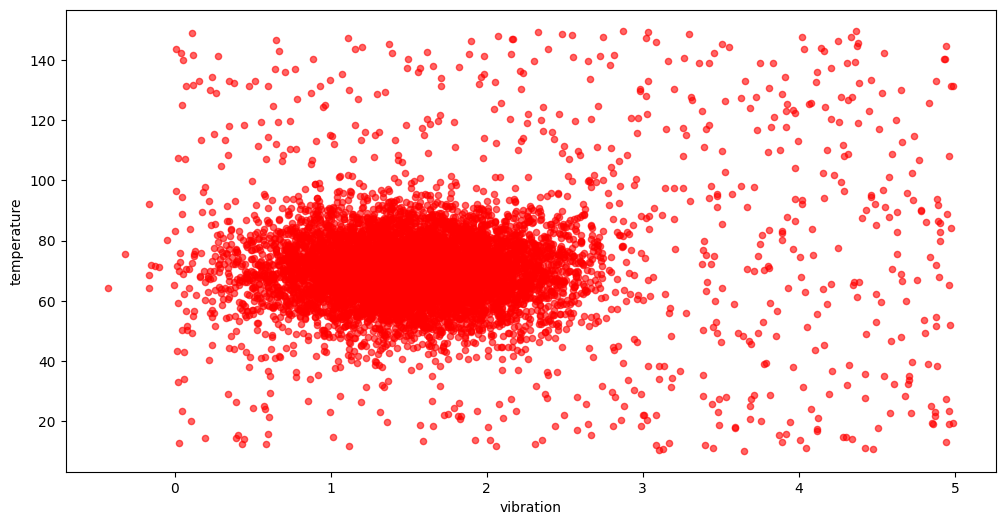

In [129]:
data.plot(kind = "scatter", figsize = (12,6), color = "red", alpha = 0.6, x = "vibration", y = "temperature")

<Axes: xlabel='pressure', ylabel='temperature'>

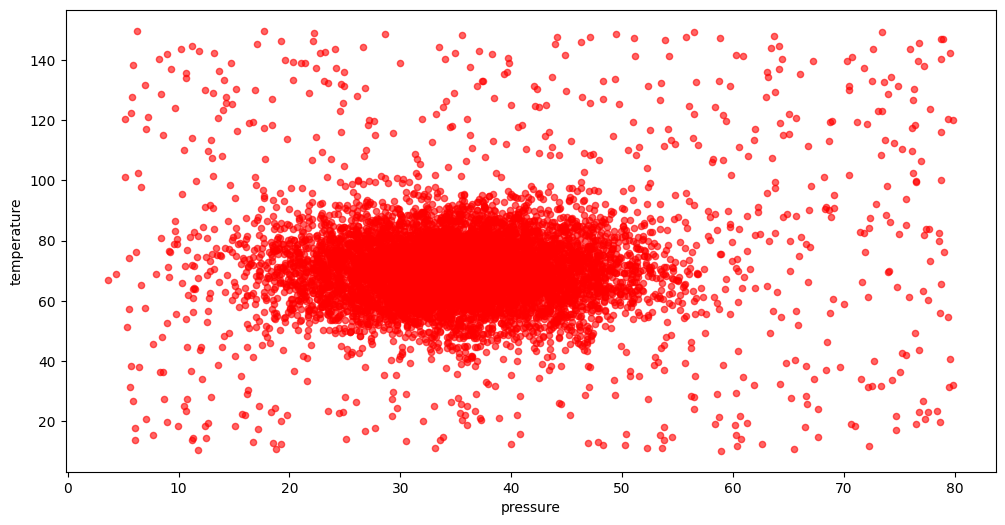

In [130]:
data.plot(kind = "scatter", figsize = (12,6), color = "red", alpha = 0.6, x = "pressure", y = "temperature")

<Axes: xlabel='humidity', ylabel='temperature'>

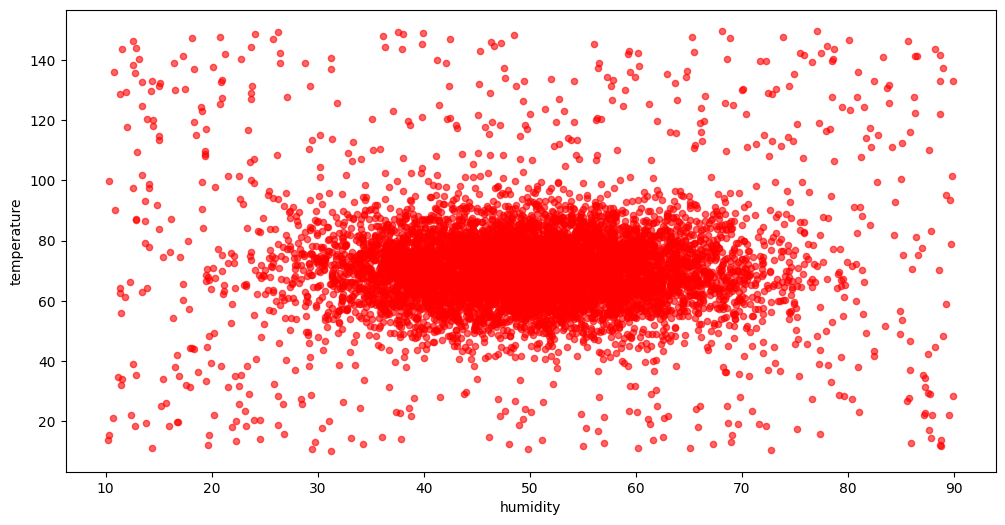

In [131]:
data.plot(kind = "scatter", figsize = (12,6), color = "red", alpha = 0.6, x = "humidity", y = "temperature")

In [132]:
# to find the correlating value then use the corr() method

corr_matrix = data.corr(numeric_only = True)
corr_matrix["faulty"].sort_values(ascending=False)

,faulty
faulty,1.000000
vibration,0.431409
pressure,0.202285
temperature,0.184296
humidity,0.012652


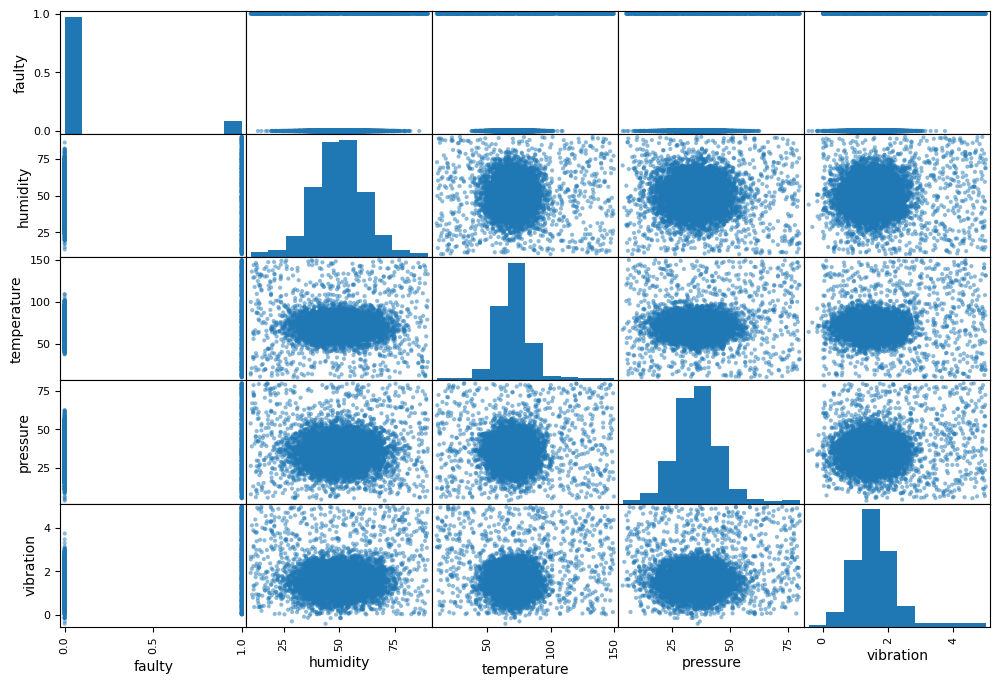

In [133]:
import pandas as pd
from pandas.plotting import scatter_matrix

features = ['faulty', 'humidity', 'temperature', 'pressure', 'vibration']
scatter_matrix(data[features], figsize=(12, 8), grid = True)
plt.show()

In [134]:
print(data.isnull().sum())

temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
faulty         0
dtype: int64


In [135]:
print(data.duplicated().sum())

0


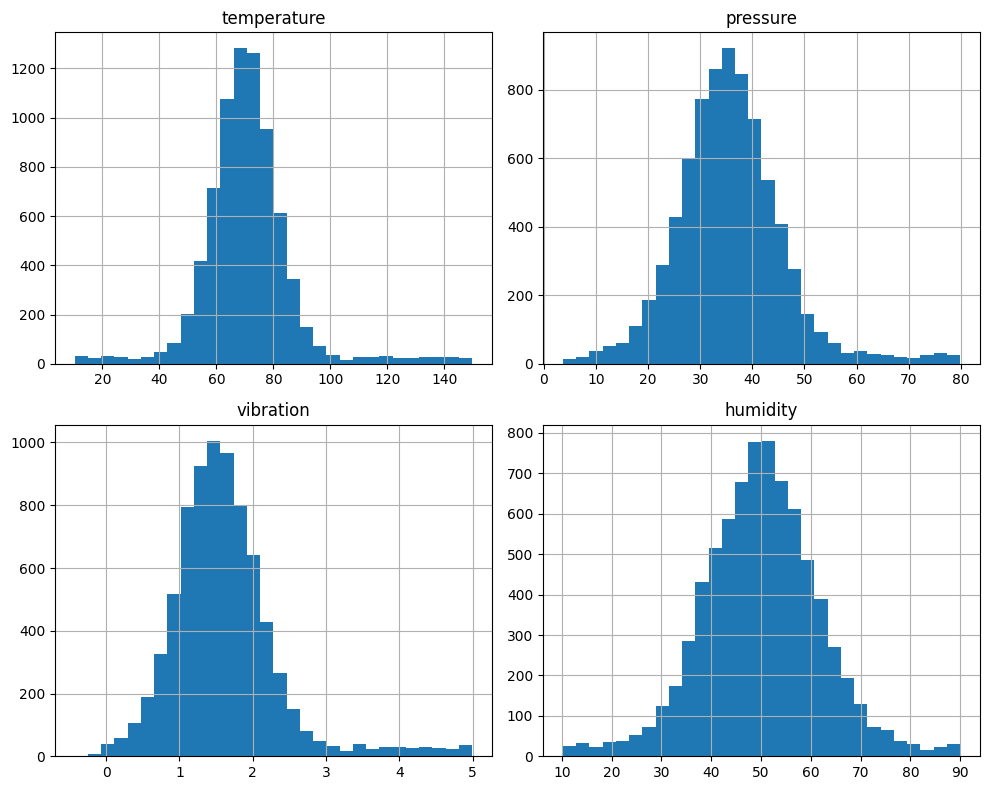

<Figure size 1000x600 with 0 Axes>

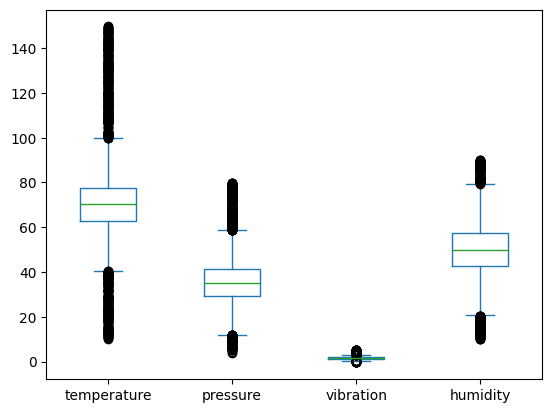

In [136]:
import seaborn as sns  # if allowed in your environment

num_cols = ["temperature", "pressure", "vibration", "humidity"]

# Histogram
data[num_cols].hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplots for outliers
plt.figure(figsize=(10, 6))
data[num_cols].plot(kind="box")
plt.show()


In [137]:
data = data.drop("equipment", axis=1)


In [138]:
data.head()

,temperature,pressure,vibration,humidity,faulty
0,58.180180,25.029278,0.606516,45.694907,0.0
1,75.740712,22.954018,2.338095,41.867407,0.0
2,71.358594,27.276830,1.389198,58.954409,0.0
3,71.616985,32.242921,1.770690,40.565138,0.0
4,66.506832,45.197471,0.345398,43.253795,0.0


In [139]:
x = data[['temperature', 'pressure', 'vibration', 'humidity']]
y = data[['faulty']]

In [140]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [141]:
# Check shapes
print("Training size:", x_train.shape)
print("Testing size:", x_test.shape)

Training size: (6137, 4)
Testing size: (1535, 4)


In [142]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns
num_cols = ["temperature", "pressure", "vibration", "humidity"]

# Initialize scaler
scaler = StandardScaler()

# Fit scaler ONLY on training data
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])

# Apply the same transformation to test data
x_test[num_cols] = scaler.transform(x_test[num_cols])


## **MODEL DEVELOPMENT**

**LOGISTIC REGRESSION**

In [143]:
from sklearn.linear_model import LogisticRegression

#initializing the model

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',   # handles class imbalance
    solver='lbfgs'
)

# Train the model
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [144]:
# Predicted class labels (0 = normal, 1 = faulty)
y_pred_lr = log_reg.predict(x_test)

# Predicted probabilities (for ROC curve and AUC)
y_prob_lr = log_reg.predict_proba(x_test)[:, 1]


In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

print("LOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("AUC:", auc_lr)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


LOGISTIC REGRESSION RESULTS
Accuracy: 0.8247557003257329
Precision: 0.32601880877742945
Recall: 0.6582278481012658
F1 Score: 0.4360587002096436
AUC: 0.7822545802193357

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90      1377
         1.0       0.33      0.66      0.44       158

    accuracy                           0.82      1535
   macro avg       0.64      0.75      0.67      1535
weighted avg       0.89      0.82      0.85      1535


Confusion Matrix:
[[1162  215]
 [  54  104]]


**RANDOM FOREST**

In [146]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,        # number of trees
    max_depth=None,         # let trees grow fully
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced', # handle imbalance
    random_state=42
)


In [147]:
rf.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [148]:
y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:, 1]


In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("RANDOM FOREST RESULTS")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("AUC:", auc_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


RANDOM FOREST RESULTS
Accuracy: 0.9785016286644951
Precision: 0.9251700680272109
Recall: 0.8607594936708861
F1 Score: 0.8918032786885246
AUC: 0.968090142761277

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1377
         1.0       0.93      0.86      0.89       158

    accuracy                           0.98      1535
   macro avg       0.95      0.93      0.94      1535
weighted avg       0.98      0.98      0.98      1535


Confusion Matrix:
[[1366   11]
 [  22  136]]


**SUPPORT VECTOR MACHINE**

In [150]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    probability=True,     # needed for AUC/ROC
    class_weight='balanced',
    C=1.0,                # regularization strength
    gamma='scale',        # automatic kernel width
    random_state=42
)


In [151]:
svm_model.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(class_weight='balanced', probability=True, random_state=42)

In [152]:
y_pred_svm = svm_model.predict(x_test)
y_prob_svm = svm_model.predict_proba(x_test)[:, 1]


In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print("SVM RESULTS")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("AUC:", auc_svm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM RESULTS
Accuracy: 0.9752442996742671
Precision: 0.8529411764705882
Recall: 0.9177215189873418
F1 Score: 0.8841463414634146
AUC: 0.9722383092946508

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1377
         1.0       0.85      0.92      0.88       158

    accuracy                           0.98      1535
   macro avg       0.92      0.95      0.94      1535
weighted avg       0.98      0.98      0.98      1535


Confusion Matrix:
[[1352   25]
 [  13  145]]


**XGBOOST**

In [154]:
from xgboost import XGBClassifier


In [160]:
xgb = XGBClassifier(
    n_estimators=300,        # number of trees
    learning_rate=0.05,     # smaller = more accurate
    max_depth=6,            # tree depth
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    gamma=0,
    reg_lambda=1,           # L2 regularization
    random_state=42,
    scale_pos_weight = (len(y_train) - y_train['faulty'].sum()) / y_train['faulty'].sum()   # handle imbalance
)

In [161]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [162]:
y_pred_xgb = xgb.predict(x_test)
y_prob_xgb = xgb.predict_proba(x_test)[:, 1]


In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("XGBOOST RESULTS")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("AUC:", auc_xgb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBOOST RESULTS
Accuracy: 0.9778501628664495
Precision: 0.8875
Recall: 0.8987341772151899
F1 Score: 0.8930817610062893
AUC: 0.9765634336247392

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1377
         1.0       0.89      0.90      0.89       158

    accuracy                           0.98      1535
   macro avg       0.94      0.94      0.94      1535
weighted avg       0.98      0.98      0.98      1535


Confusion Matrix:
[[1359   18]
 [  16  142]]
